In [894]:
import numpy as np
import matplotlib.pyplot as plt

In [895]:
# modelling the arrival process

# per second converyor belt

conveyor1=1
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 
conveyor2=2/3

stationFailrate=0.01
stationmean=1/stationFailrate

In [896]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return N

In [897]:
# total number of entities conveyor1 delivers per second for 1000 seconds
c1sample=[poisson_est(1)  for i in range(1000)]


In [898]:
# total entities conveyor belt delivers
totalc1=sum(c1sample)
totalc1

966.0

In [899]:
def conveyor2(time):
    # number of entities conveyor2 delivers over a given time
    return (int(time/1.5))
conveyor2(1000)

666

In [900]:
def failtime(frate,time):
    # per unit time
    time=time%100
    # cdf of failure 
    c_fail=1 - np.exp(-frate* time)
    if(c_fail>=np.random.random()):
        return time
    else: 
        return 0    

In [901]:
def failnow(frate,time):
    # prob of failure in next second
    p_fail=frate*np.exp(-frate*0)+ frate*np.exp(-frate*1)

    if(p_fail>=np.random.random()):
        return time
    else: 
        return 0 

In [902]:
f=np.array([failnow(0.01,time) for time in range(10000)])
(10000-sum(f==0)) /10000
# failtime=
f[f!=0]



array([ 277,  387,  408,  423,  424,  484,  496,  521,  532,  535,  546,
        575,  799,  818,  855,  874,  919,  970,  996, 1029, 1052, 1148,
       1232, 1271, 1378, 1473, 1481, 1519, 1546, 1616, 1628, 1642, 1840,
       1846, 1857, 2011, 2050, 2083, 2129, 2168, 2172, 2179, 2187, 2264,
       2277, 2323, 2330, 2451, 2470, 2477, 2637, 2683, 2718, 2744, 2787,
       2840, 2890, 2943, 2967, 3009, 3011, 3058, 3091, 3117, 3119, 3147,
       3151, 3172, 3305, 3313, 3331, 3346, 3402, 3414, 3422, 3615, 3638,
       3656, 3698, 3708, 3733, 3744, 3806, 3832, 3848, 3902, 3924, 4097,
       4101, 4180, 4211, 4257, 4258, 4304, 4313, 4329, 4347, 4385, 4402,
       4431, 4442, 4549, 4575, 4622, 4667, 4681, 4698, 4794, 4879, 4897,
       4929, 4972, 5022, 5148, 5178, 5224, 5386, 5428, 5497, 5498, 5684,
       5726, 5783, 5792, 5909, 5923, 6063, 6101, 6162, 6168, 6199, 6204,
       6213, 6241, 6245, 6246, 6389, 6411, 6430, 6437, 6540, 6564, 6642,
       6686, 6690, 6697, 6701, 6729, 6766, 6776, 68

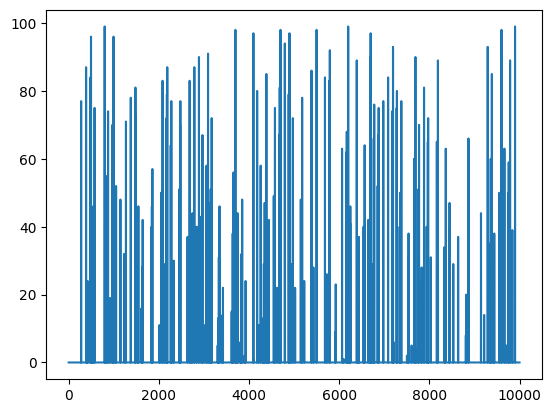

In [903]:
f=f%100
plt.plot(np.arange(0,10000),f)

In [904]:
# for each second, check the 
def simulate(time):
    C1event=[]
    stationFailures=[]
    completed=0

    # stacks to count waiting entities at each conveyour belt C
    stackC1=[]
    stackC2=[]
    def addtoC1(time_index,stackC1,C1event):
            if len(stackC1)==0:
                stackC1.append(C1event[time_index])
            else:
                stackC1.append(C1event[time_index]+stackC1[-1])

    # add a entity to the stack every 1.5 seconds
    def addtoC2(time_index,stackC2):
        if time_index%1.5==0:
            if len(stackC2)==0:
                stackC2.append(1)
            else:
                stackC2.append(stackC2[-1]+1)


# simulate events with respect to random variables
    for t in np.arange(0,time):
        C1event.append(poisson_est(1))
        stationFailures.append(failnow(0.01,t))

    for time_index in np.arange(0,time):
        addtoC1(time_index,stackC1,C1event)
        addtoC2(time_index,stackC2)
        print("stackc2",stackC2[-1],"\nstackc1",stackC1[-1])
        # if both parts are ready
        if stackC1 and stackC2 and stackC1[-1]>0 and stackC2[-1]>0:
            # check if the machine is working
            if stationFailures[time_index]>0:
                for standyby in range(5):
                    curr=standyby+1+time_index

                    # conveyors run during downtime
                    addtoC1(curr,stackC1,C1event)
                    addtoC2(curr,stackC2)

                # count continues 5 seconds after
                if time_index+5==time:
                    return completed

                # else
                time_index+=5
                if stackC2[-1]==1:
                    stackC2.pop()
                else:
                    stackC2[-1]-=1 
                
                if stackC1[-1]==1:
                    stackC1.pop() 
                else:
                    stackC1[-1]==1
            
                completed+=1
            else: #if the machine is working
                stackC2[-1]-=1
                stackC1[-1]-=1
                completed+=1
        print("\npost\nstackc2",stackC2[-1],"\nstackc1",stackC1[-1],'\ntime',time_index,'\n',completed,'\n\n')
    return completed



In [905]:
simulate(10000)

stackc2 1 
stackc1 2.0

post
stackc2 0 
stackc1 1.0 
time 0 
 1 


stackc2 0 
stackc1 1.0

post
stackc2 0 
stackc1 1.0 
time 1 
 1 


stackc2 0 
stackc1 2.0

post
stackc2 0 
stackc1 2.0 
time 2 
 1 


stackc2 1 
stackc1 3.0

post
stackc2 0 
stackc1 2.0 
time 3 
 2 


stackc2 0 
stackc1 2.0

post
stackc2 0 
stackc1 2.0 
time 4 
 2 


stackc2 0 
stackc1 4.0

post
stackc2 0 
stackc1 4.0 
time 5 
 2 


stackc2 1 
stackc1 5.0

post
stackc2 0 
stackc1 4.0 
time 6 
 3 


stackc2 0 
stackc1 5.0

post
stackc2 0 
stackc1 5.0 
time 7 
 3 


stackc2 0 
stackc1 5.0

post
stackc2 0 
stackc1 5.0 
time 8 
 3 


stackc2 1 
stackc1 5.0

post
stackc2 0 
stackc1 4.0 
time 9 
 4 


stackc2 0 
stackc1 4.0

post
stackc2 0 
stackc1 4.0 
time 10 
 4 


stackc2 0 
stackc1 7.0

post
stackc2 0 
stackc1 7.0 
time 11 
 4 


stackc2 1 
stackc1 7.0

post
stackc2 0 
stackc1 6.0 
time 12 
 5 


stackc2 0 
stackc1 7.0

post
stackc2 0 
stackc1 7.0 
time 13 
 5 


stackc2 0 
stackc1 7.0

post
stackc2 0 
stackc1 7.0 
time 

3414